<a href="https://colab.research.google.com/github/ganeshbmc/markets/blob/master/quant%20trading/iv_based_stddev_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple strategy based on ATM IV and std deviations

`Define your input variables here`  

In [1]:
# Input
underlying = "nifty_bank"
atm_iv = 12.8
spot_prev_close = 43260
spot_current = 43350
atm_strike = 43300
days_to_expiry = 5
risk_stddev = 1.5

`Import necessary libraries`

In [2]:
import math as m
import numpy as np
import pandas as pd
import datetime as dt

`Calculation engine`  

In [3]:
def expected_move_pct(atm_iv, days_to_expiry, risk_stddev):
    exp_move_pct = (atm_iv/(m.sqrt(256/days_to_expiry)))
    exp_move_pct_for_desired_risk = exp_move_pct * risk_stddev
    return exp_move_pct, exp_move_pct_for_desired_risk

def get_strikes(underlying, atm_iv, spot_prev_close, days_to_expiry, risk_stddev):
    mv1, mv2 = expected_move_pct(atm_iv, days_to_expiry, risk_stddev)
    points_move = spot_prev_close * (mv2/100)
    lower_strike = spot_prev_close - points_move
    upper_strike = spot_prev_close + points_move

    # output = f"""
    # Underlying: {str.upper(underlying)}
    # Period of interest: {days_to_expiry} days
    # ATM IV: {atm_iv}

    # Percentage move based on IV (for 1 stddev) is: {mv1:.2f}
    # Desired risk level: {risk_stddev} std dev
    # Percentage move for risk (stdev) desired is: {mv2:.2f}

    # Spot price of interest: {spot_prev_close}
    # Points to move from spot: {points_move:.0f}

    # Lower strike: {lower_strike:.0f}
    # Upper strike: {upper_strike:.0f}
    # """

    dict_results = {
    "Underlying": str.upper(underlying),
    "Spot price of interest": f"{spot_prev_close}",
    "Period of interest": f"{days_to_expiry} days",
    "ATM IV": f"{atm_iv}",
    "Pct move for 1 stddev": f"{mv1:.2f}%",
    "Desired risk level": f"{risk_stddev} std dev",
    f"Pct move for {risk_stddev} std dev": f"{mv2:.2f}%",
    "Points to move from spot": f"{points_move:.0f}",
    "Lower strike": f"{lower_strike:.0f}",
    "Upper strike": f"{upper_strike:.0f}",
    }

    table = pd.DataFrame([dict_results]).T
    return table

`Output`  

In [4]:
get_strikes(underlying, atm_iv, spot_prev_close, days_to_expiry, risk_stddev)

,0
Underlying,NIFTY_BANK
Spot price of interest,43260
Period of interest,5 days
ATM IV,12.8
Pct move for 1 stddev,1.79%
Desired risk level,1.5 std dev
Pct move for 1.5 std dev,2.68%
Points to move from spot,1161
Lower strike,42099
Upper strike,44421


In [5]:
df = pd.read_csv('bankindia_1yr.csv')
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,05-Dec-2022,EQ,85.10,87.5,84.90,84.55,86.30,86.30,86.22,87.5,40.4,16512468,"1,423,740,107.00",54690
1,02-Dec-2022,EQ,82.50,85.7,82.50,83.10,84.80,84.55,84.27,85.7,40.4,19118072,"1,611,066,269.95",48147
2,01-Dec-2022,EQ,82.55,84.0,80.15,82.30,83.10,83.10,82.01,85.5,40.4,16662882,"1,366,483,876.00",45243
3,30-Nov-2022,EQ,84.20,85.0,81.80,83.75,82.05,82.30,83.10,85.5,40.4,10057927,"835,846,523.25",30351
4,29-Nov-2022,EQ,81.60,85.5,81.15,81.25,83.80,83.75,83.64,85.5,40.4,22577829,"1,888,402,657.65",54611


In [6]:
df.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [8]:
df.shape

(128, 14)

In [7]:
bi = df[['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ']]
       
bi.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close
0,05-Dec-2022,EQ,85.10,87.5,84.90,84.55,86.30,86.30
1,02-Dec-2022,EQ,82.50,85.7,82.50,83.10,84.80,84.55
2,01-Dec-2022,EQ,82.55,84.0,80.15,82.30,83.10,83.10
3,30-Nov-2022,EQ,84.20,85.0,81.80,83.75,82.05,82.30
4,29-Nov-2022,EQ,81.60,85.5,81.15,81.25,83.80,83.75


In [10]:
bi.shape

(128, 8)

In [11]:
bi.describe()

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,53.455859,54.549219,52.682813,53.337109,53.615625,53.636719
std,11.321008,11.872648,11.118691,11.214888,11.572280,11.576280
min,41.500000,42.100000,40.400000,41.050000,41.300000,41.050000
25%,46.862500,47.412500,46.187500,46.750000,46.800000,46.750000
50%,48.925000,49.700000,48.300000,48.925000,48.925000,49.025000
75%,52.525000,53.287500,51.625000,52.475000,52.512500,52.562500
max,85.100000,87.500000,84.900000,84.550000,86.300000,86.300000


<AxesSubplot:>

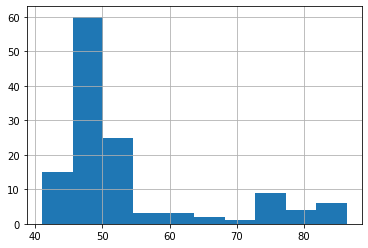

In [16]:
bi['close '].hist()

In [17]:
bi['pc'] = bi['close '].pct_change()
bi.head()

/tmp/ipykernel_5987/1475387270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bi['pc'] = bi['close '].pct_change()


,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,pc
0,05-Dec-2022,EQ,85.10,87.5,84.90,84.55,86.30,86.30,NaN
1,02-Dec-2022,EQ,82.50,85.7,82.50,83.10,84.80,84.55,-0.020278
2,01-Dec-2022,EQ,82.55,84.0,80.15,82.30,83.10,83.10,-0.017150
3,30-Nov-2022,EQ,84.20,85.0,81.80,83.75,82.05,82.30,-0.009627
4,29-Nov-2022,EQ,81.60,85.5,81.15,81.25,83.80,83.75,0.017618


<AxesSubplot:>

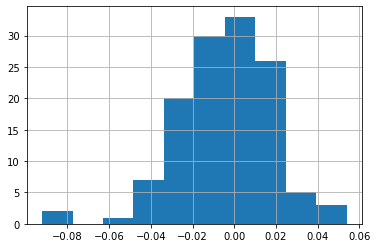

In [18]:
bi['pc'].hist()

In [19]:
bi.describe()

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,pc
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,127.000000
mean,53.455859,54.549219,52.682813,53.337109,53.615625,53.636719,-0.004360
std,11.321008,11.872648,11.118691,11.214888,11.572280,11.576280,0.022579
min,41.500000,42.100000,40.400000,41.050000,41.300000,41.050000,-0.092117
25%,46.862500,47.412500,46.187500,46.750000,46.800000,46.750000,-0.016721
50%,48.925000,49.700000,48.300000,48.925000,48.925000,49.025000,-0.003799
75%,52.525000,53.287500,51.625000,52.475000,52.512500,52.562500,0.010758
max,85.100000,87.500000,84.900000,84.550000,86.300000,86.300000,0.053797
